作業
在鐵達尼資料集中，今天我們專注觀察變數之間的相關性，以Titanic_train.csv 中，首先將有遺失值的數值刪除，並回答下列問題。

Q1: 透過數值法計算 Age 和 Survived 是否有相關性?
Q2:透過數值法計算 Sex 和 Survived 是否有相關性?
Q3: 透過數值法計算 Age 和 Fare 是否有相關性?
提示:
1.產稱一個新的變數 Survived_cate ，資料型態傳換成類別型態
2.把題目中的 Survived 用 Survived_cate 來做分析
3.首先觀察一下這些變數的資料型態後，再來想要以哪一種判斷倆倆的相關性。

In [45]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

import pingouin as pg
import researchpy   
%matplotlib inline

## 讀入資料

In [46]:
df_train = pd.read_csv("Titanic_train.csv")
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [47]:
## 這邊我們做一個調整，把 Survived 變成離散型變數 Survived_cate
print(df_train['Survived'])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


### Q1: 透過數值法計算 Age 和 Survived 是否有相關性?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB
--------------------------------------------------
相關係數為= -0.07722109457217766
p-value= 0.039124654013465966
無線性關係
--------------------------------------------------
            Age_avg    Age_std
Survived                      
0         30.626

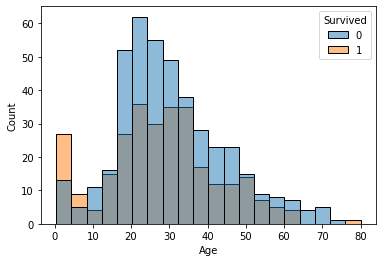

In [48]:
#Age和Survived都是離散型資料
#-->用pearson相關係數

#stet1:資料清理(把空值剔除):使用dropna，並且複製一份給新變數，避免動到原資料
data_dropna=df_train.dropna(subset=['Age','Survived'],inplace=False).copy()
data_dropna.info()
#step2:使用person相關係數
corr,p_value=stats.pearsonr(data_dropna['Age'],data_dropna['Survived'])
print('-'*50)
print('相關係數為=',corr)
print('p-value=',p_value)
print('無線性關係')
sns.histplot(data=data_dropna,hue='Survived',x='Age')
Age_avg=data_dropna.groupby(['Survived']).mean()['Age']
Age_std=data_dropna.groupby(['Survived']).std()['Age']
data_concat=pd.concat([Age_avg,Age_std],axis=1)
data_concat.columns=['Age_avg','Age_std']
print('-'*50)
print(data_concat)

### Q2:透過數值法計算 Sex 和 Survived 是否有相關性?


In [49]:
#stet1:資料清理(把空值剔除):使用dropna+把sex轉成數字形式，並且複製一份給新變數，避免動到原資料

#清除空值
data_dropna=df_train.dropna(subset=['Sex','Survived'],inplace=False).copy()
##將Sex由字串轉成數字形式
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data_dropna['Sex']=labelencoder.fit_transform(data_dropna['Sex'])
# print(data_dropna['Sex'])
#step2:使用person相關係數
corr,p_value=stats.pearsonr(data_dropna['Sex'],data_dropna['Survived'])
print('-'*50)
print('Sex和Survived的相關係數為=',corr)
print('p-value=',p_value)
print('：兩者中度負相關')

--------------------------------------------------
Sex和Survived的相關係數為= -0.543351380657755
p-value= 1.406066130878875e-69
：兩者中度負相關


### Q3: 透過數值法計算 Age 和 Fare 是否有相關性?

In [50]:
data_dropna=df_train.dropna(subset=['Age','Fare'],inplace=False).copy()
corr,p_value=stats.pearsonr(data_dropna['Age'],data_dropna['Fare'])
print('-'*50)
print('Corr=',corr)
print('P-value=',p_value)
print('輕微的正相關')

--------------------------------------------------
Corr= 0.0960666917690389
P-value= 0.010216277504442105
輕微的正相關
